# Projeto de Trainee - Visão Computacional
Por Camilla de Oliveira Fonseca

<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="370">



Esse miniprojeto é na verdade uma missão secreta Jedi cujo objetivo é criar um sistema de segurança que classifica se uma imagem contém o Mestre Yoda, o Lord Sith Darth Vader ou algum Stormtrooper. Para isso está separado em 2 partes (Manipulação e Classificação).

# 1. Tarefas de Manipulação

## Tarefa 1.1
Criar uma função que recebe o endereço de uma imagem e retorna sua visualização.

### 1.1.1. Com Pillow

In [1]:
#Importando a classe Image da Pillow
from PIL import Image

In [2]:
def visualiza_img_pil(endereco):
    '''Recebe o endereco da img e retorna a visualizacao.'''
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    # Exibe a img
    im.show()

In [3]:
visualiza_img_pil(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

A função *visualiza_img_pil()* exibe a imagem em uma janela. Para que a imagem apareça no notebook, criei *visualiza_img_pil2()*.

In [4]:
from IPython.display import display

In [5]:
def visualiza_img_pil2(endereco):
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    #Exibe a img
    display(im)

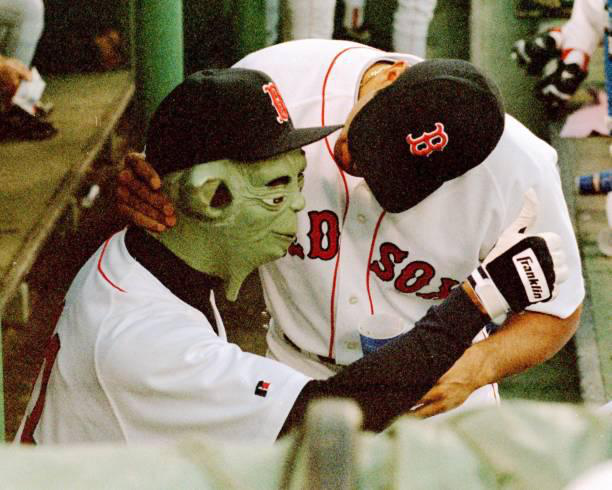

In [6]:
visualiza_img_pil2(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

Podemos ver o Yoda disfarçado de jogador de beisebol para se esconder dos Sith.

### 1.1.2. Com matplotlib

In [2]:
import matplotlib.pyplot as plt

In [8]:
def visualiza_img_plt(endereco):
    # Carrega a img como array
    img = plt.imread(endereco)
    
    # Exibe a imagem
    imgplot = plt.imshow(img)
    
    # Tira os eixos
    plt.axis('off')
    
    plt.show()

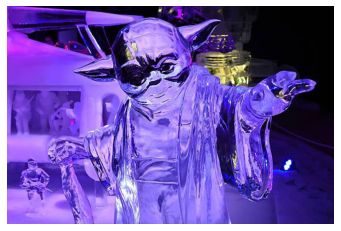

In [9]:
visualiza_img_plt(r".\dataset\Yoda\70a7274701636ab811e99afca3d32c2344f12526.jpg")

Vemos agora Yoda se camuflando com técnicas camaleônicas.

### 1.1.3. Com OpenCV

In [4]:
import numpy as np

In [1]:
import cv2

ModuleNotFoundError: No module named 'cv2.cv2'

In [11]:
def visualiza_img_cv2(endereco):
    
    # Carrega a img
    img = cv2.imread(endereco)
    
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [12]:
visualiza_img_cv2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

*visualiza_img_cv2()* também exibe a imagem em uma janela.

Agora usando OpenCV *e* Matplotlib:

In [13]:
def visualiza_img_cv2_2(endereco):
    
    # Carrega a img
    img_bgr = cv2.imread(endereco)
    
    # Converte a imagem para RGB, padrao do matplotlib, pq o da OpenCV eh BGR
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    
    # Tira eixos
    plt.axis('off')
    
    plt.show()

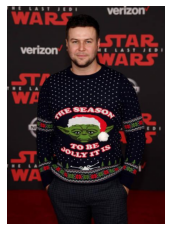

In [14]:
visualiza_img_cv2_2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

Ele realmente dominou a arte do disfarce.

## Tarefa 1.2
Escrever função que converte uma imagem colorida em uma imagem preto e branco usando numpy. Depois ver como converter espaços de cores usando OpenCV.

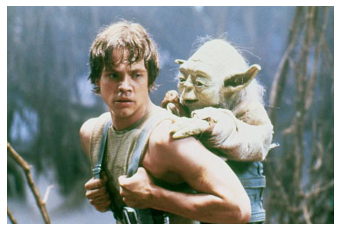

In [15]:
img_teste = plt.imread(r".\dataset\Yoda\ca30b75ea62ffa2730afe88aab4f0784c5505986.jpg")

def visualiza_img_rgb(img, sem_eixo = True):
    '''Recebe um 3darray que representa uma imagem rgb e exibe sua visualizacao.
    Pode exibir a imagem sem (padrão) ou com eixo.'''
    imgplot = plt.imshow(img)
    if sem_eixo:
        plt.axis('off')
    plt.show()
    
visualiza_img_rgb(img_teste)

### Usando numpy

Uma imagem colorida é representada como um array tridimensional, composto de três arrays bidimensionais (vulgo matrizes), contendo os valores de cada pixel para cada canal: vermelho, verde e azul (RGB). Para convertê-la em uma imagem em preto e branco (que terá um só canal), fazemos uma combinação linear dos valores de vermelho, verde e azul para cada pixel e pegamos o valor resultante em grayscale. A forma mais intuitiva de fazer isso é fazendo uma média dos três valores, mas há também a seguinte fórmula: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f84d67895d0594a852efb4a5ac421bf45b7ed7a8" width="400"> que foi estabelecida de acordo com a diferença na sensibilidade visual do olho humano para cada cor primária. R,G,Blinear correspondem à aplicação da expansão gamma dos valores de RGB que geralmente são armazenados com compressão gamma: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b5eb0d87fe5e8f06d1000b348583e76e7d9ad32c" width="400">
Depois o Ylinear passa por compressão gamma novamente. Como essas operações tem alto custo computacional, usa-se também uma aproximação <img src="https://brohrer.github.io/images/image_processing/rgb2gray_eq_approx.png" width="300"> que é o que OpenCV faz. ([referência](https://www.kdnuggets.com/2019/12/convert-rgb-image-grayscale.html))

Implementarei a função com numpy usando a média.

In [16]:
def para_PeB_np(img_rgb):
    '''(3darray) -> 1darray
    Recebe uma imagem em rgb e retorna a conversao em preto e branco dessa imagem.
    '''
    return np.mean(img_rgb, axis=2)

def visualiza_img_PeB(img_peb):
    '''Recebe um 1darray que representa uma imagem p&b e exibe sua visualizacao.'''
    imgplot = plt.imshow(img_peb, cmap = 'gray')
    plt.axis('off')
    plt.show()

### Com OpenCV

In [17]:
def para_PeB_cv2(img_bgr):
    '''(3darray) -> 1darray
    Recebe uma imagem em bgr e retorna a conversao em preto e branco dessa imagem.
    '''
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

Com numpy:


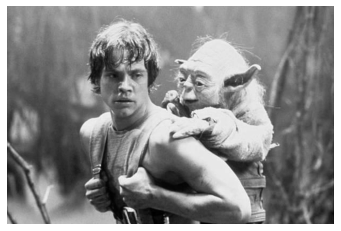

Com OpenCV:


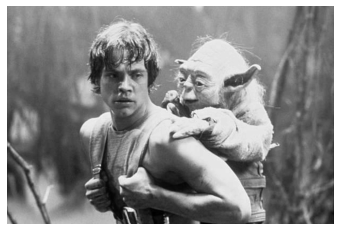

In [18]:
print("Com numpy:")
visualiza_img_PeB(para_PeB_np(img_teste))
print("Com OpenCV:")
visualiza_img_PeB(para_PeB_cv2(img_teste))

Vemos a comparação do resultado dos dois métodos de conversão.

Vale notar também que OpenCV usa espaços BGR em vez de RGB, cuja diferença é a ordem dos canais no array tridimensional.

## Tarefa 1.3
Augmentation: fazer algumas modificações nas imagens existentes para criar imagens que contenham informações novas e aumentar o dataset.
Crie uma função que recebe uma imagem e aplica o processo de augmentation nela.
Técnicas a serem usadas:
    - Inverter a imagem (flip)
    - Rotacionar de um ângulo aleatório
    - Zoom aleatório na imagem
    - Contraste aleatório
    - Brilho aleatório

Vou implementar a rotação e o contraste na mão com numpy.

In [19]:
def rotaciona(img, ang_graus, preserva = True):
    '''(array, float) -> array
    Recebe uma imagem e um angulo em graus e retorna a rotacao da imagem desse angulo.
    A imagem resultante pode preservar a dimensao original, cortando a imagem (padrao),
    ou ter dimensao nova, preservando toda a original.'''
    
    # Pega dimensoes da img
    nlin,ncol,c = img.shape
    
    # Calcula seno e cosseno
    ang_rad = np.radians(ang_graus)
    sen_a = np.sin(ang_rad)
    cos_a = np.cos(ang_rad)
    
    # Calcula dimensoes da imagem resultante
    if preserva:
        nlin_rot, ncol_rot = nlin, ncol
    else:
        # Dimensoes para caber tudo
        nlin_rot= int(np.ceil(nlin*abs(cos_a) + ncol*abs(sen_a)))
        ncol_rot= int(np.ceil(nlin*abs(sen_a) + ncol*abs(cos_a)))
    
    # Cria matriz de zeros
    img_rot = np.zeros([nlin_rot,ncol_rot,c], dtype=np.uint8)
    
    # Calcula coordenados do centro das imagens
    centro_original = np.ceil((nlin/2,ncol/2))
    centro_rot = np.ceil((nlin_rot/2,ncol_rot/2))
    
    # Rotaciona a imagem com base na matriz de rotacao transposta
    # Transformacao que interpola cada pixel de img_rot em img
    for lin in range(nlin_rot):
        for col in range(ncol_rot):
            
            x = (lin - centro_rot[0])*cos_a + (col - centro_rot[1])*sen_a
            y = -(lin - centro_rot[0])*sen_a + (col - centro_rot[1])*cos_a
            x = int(np.round(x) + centro_original[0])
            y = int(np.round(y) + centro_original[1])
            
            if (x>=0 and y>=0 and x<nlin and y<ncol):
                img_rot[lin,col] = img[x,y]
                
    return img_rot

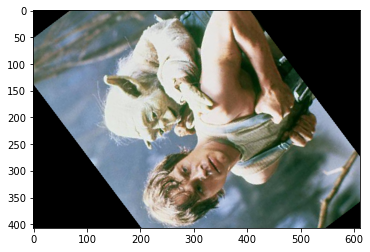

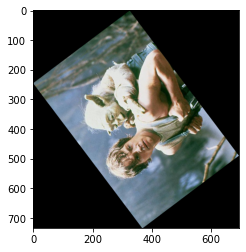

In [20]:
visualiza_img_rgb(rotaciona(img_teste, 127), sem_eixo = False)
visualiza_img_rgb(rotaciona(img_teste, 127, False), sem_eixo = False)

Um modo de implementar o contraste é multiplicar cada pixel por uma constante positiva k, se k>1, o contraste aumenta, se k<1, diminui, não deixando os valores saírem do intervalo [0, 255]

In [21]:
def contraste(img, k):
    '''(array, float) -> array
    Recebe uma imagem e um fator de contraste (constante positiva)
    e retorna a imagem com contraste ajustado de acordo com esse fator.'''
    
    # Pega dimensoes da img
    nlin,ncol,c = img.shape
    
    # Cria matriz de zeros
    img_contr = np.zeros([nlin,ncol,c], dtype=np.uint8)
    
    for lin in range(nlin):
        for col in range(ncol):
            for chan in range(c):
                v = img[lin,col,chan]*k
                if v>255:
                    v = 255
                elif v<0:
                    v = 0
                img_contr[lin,col,chan] = v
            
    return img_contr

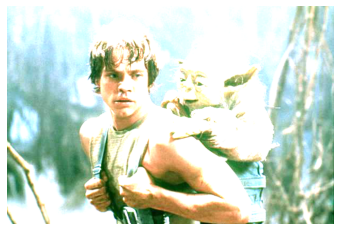

In [51]:
visualiza_img_rgb(contraste(img_teste, 2))

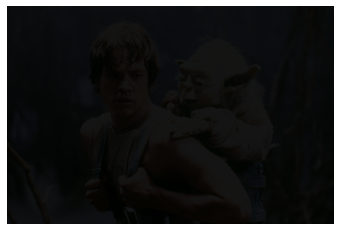

In [23]:
visualiza_img_rgb(contraste(img_teste, 0.09))

Vou implementar o zoom com scipy, flip e brilho com OpenCV.

In [24]:
from scipy.ndimage import zoom

In [43]:
def zoom_corta(img, fator_zoom):
    '''(array, float) -> array
    Recebe uma imagem e um fator de zoom igual ou superior a 1 e retorna
    uma imagem correspondente ao seu zoom de acordo com esse fator,
    cortando-a para preservar a dimensao.'''
    
    # Se o fator for 1, a imagem nao se alterara
    if fator_zoom == 1:
        return img

    nlin, ncol = img.shape[:2]

    # Em imagens coloridas, nao queremos aplicar o zoom na dimensao RGB
    # Entao, cria tupla de fatores zoom, um para cada dimensao do array
    # Com fator 1 para qualquer dimensao depois da altura e largura
    fzoom_tupla = (fator_zoom,) * 2 + (1,) * (img.ndim - 2)
        
    # Calcula coordenadas para selecionarmos apenas a regiao
    # da imagem original que estara no zoom
    z_nlin = int(np.ceil(nlin / fator_zoom))
    z_ncol = int(np.ceil(ncol / fator_zoom))
    z_x = (nlin - z_nlin) // 2
    z_y = (ncol - z_ncol) // 2

    # Cria imagem zoom
    img_zoom = zoom(img[z_x : z_x + z_nlin, z_y : z_y + z_ncol], fzoom_tupla)

    # 'img_zoom' ainda pode estar um pouco maior que 'img' por conta de
    # arredondamento, entao ajusta a dimensao da imagem zoom
    x_ajuste = ((img_zoom.shape[0] - nlin) // 2)
    y_ajuste = ((img_zoom.shape[1] - ncol) // 2)
    img_zoom = img_zoom[x_ajuste : x_ajuste + nlin, y_ajuste : y_ajuste + ncol]

    return img_zoom

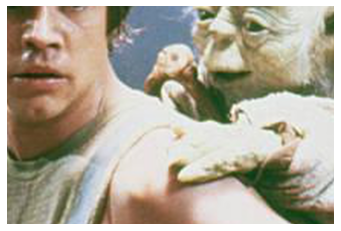

In [45]:
visualiza_img_rgb(zoom_corta(img_teste, 2.85))

In [27]:
def brilho(img, fator_brilho):
    '''(array, float) -> array
    Recebe uma imagem e um fator de brilho e retorna a imagem
    com brilho ajustado de acordo com esse fator.'''
    
    # Converte para hsv
    hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    # Adiciona o fator ao brilho de cada pixel
    h, s, v = cv2.split(hsv_img)
    v = cv2.add(v, fator_brilho)
    v[v > 255] = 255
    v[v < 0] = 0
    hsv_img = cv2.merge((h, s, v))
    
    # Converte de volta para rgb e retorna o resultado
    return cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

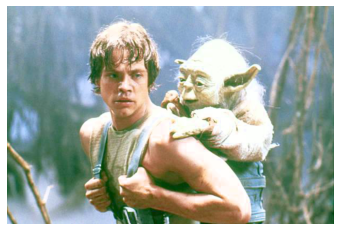

In [63]:
visualiza_img_rgb(brilho(img_teste, 35))

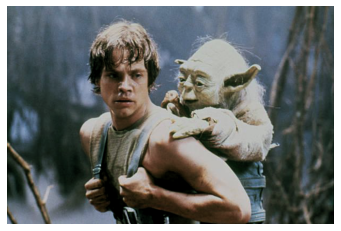

In [29]:
visualiza_img_rgb(brilho(img_teste, -40.5))

### Augmentation

In [6]:
import random

In [64]:
def augmentation(img):
    '''(array) -> array
    Recebe uma imagem, aplica o processo de augmentation e retorna uma imagem 'aumentada'.'''
    
    img_aug = np.copy(img)
    
    # Flip
    # Se o segundo argumento (int) for >0, o flip sera feito em torno do eixo y;
    # = 0, em torno de x; <0, em torno de ambos
    img_aug = cv2.flip(img_aug, random.randint(-1,1))
    
    # Zoom aleatorio, 1 <= fator de zoom (float) <= 4
    img_aug = zoom_corta(img_aug, random.uniform(1,4))
    
    # Contraste aleatorio, 0.1 <= fator de contraste <= 3
    img_aug = contraste(img_aug, random.uniform(0.1,3))
    
    # Brilho aleatorio, -70 <= fator de brilho <= 70
    img_aug = brilho(img_aug, random.uniform(-70,70))
    
    # Rotacao de angulo em graus aleatorio
    img_aug = rotaciona(img_aug, random.uniform(0,360))
    
    return img_aug

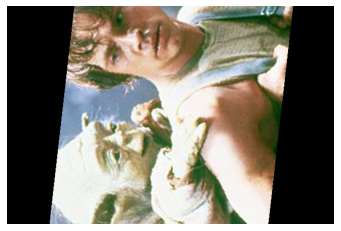

In [65]:
visualiza_img_rgb(augmentation(img_teste))

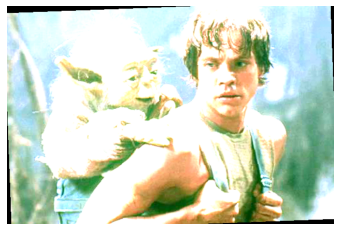

In [66]:
visualiza_img_rgb(augmentation(img_teste))

## Tarefa 1.4
Aplicar em uma imagem um filtro de blur, gaussian blur e median blur.
Criar um kernel e aplicar na imagem utilizando OpenCV.

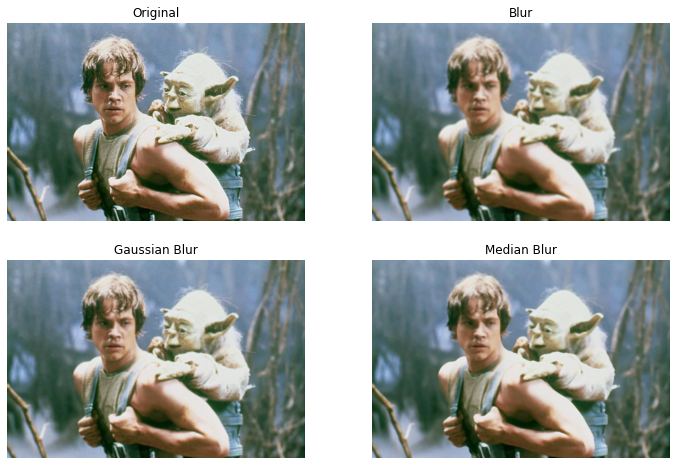

In [124]:
plt.subplot(2,2,1),plt.imshow(img_teste),plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(cv2.blur(img_teste, (5,5))),plt.title('Blur')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(cv2.GaussianBlur(img_teste, (5,5),1)),plt.title('Gaussian Blur')
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(cv2.medianBlur(img_teste,5)),plt.title('Median Blur')
plt.axis('off') 
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Testando outros kernels

In [143]:
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

custom = np.array((
    [0, 1, 0],
    [1, -5, 1],
    [0, 1, 0]), dtype="int")

laplace = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

O primeiro kernel é um kernel de apuração, o segundo eu criei para ver o que acontecia se invertesse os valores e lembra um pouco o operador de Laplace. Abaixo, vemos que o segundo ressalta um pouco os contornos da imagem, embora não tão bem quanto o de Laplace.

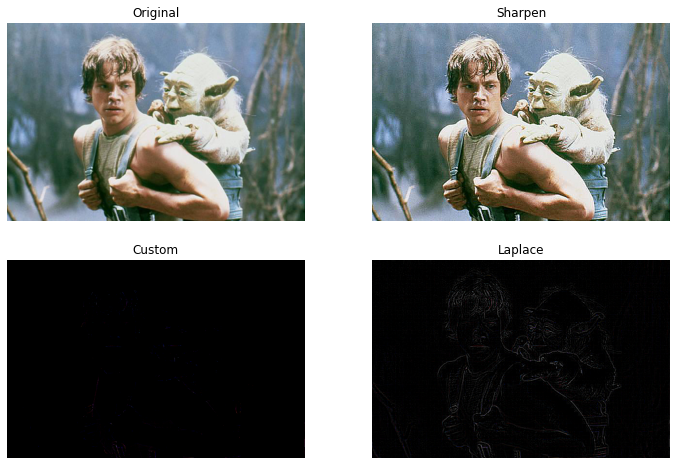

In [144]:
plt.subplot(2,2,1),plt.imshow(img_teste),plt.title('Original')
plt.axis('off')
plt.subplot(2,2,2),plt.imshow(cv2.filter2D(img_teste, -1, sharpen)),plt.title('Sharpen')
plt.axis('off')
plt.subplot(2,2,3),plt.imshow(cv2.filter2D(img_teste, -1, custom)),plt.title('Custom')
plt.axis('off')
plt.subplot(2,2,4),plt.imshow(cv2.filter2D(img_teste, -1, laplace)),plt.title('Laplace')
plt.axis('off') 
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

# 2. Tarefas de Classificação

## Tarefa 2.1
Dividir as imagens em um diretório com imagens de treino, teste e validação.

Vou usar os, shutil, numpy e random.

In [2]:
import os

In [3]:
import shutil

In [23]:
def separa_train_test_val(root_dir, classes_dir, test_ratio, val_ratio):
    '''Recebe um diretorio com um sub-diretorio para cada classe, onde as imagens das respectivas
    classes estao armazenadas; uma lista com os sub-diretorios; a porcentagem de dados para teste e validacao.
    Separa as imagens em diretorios "train", "test" e "val" de acordo com essas porcentagens.
    '''
    
    for cls in classes_dir:
        train_dest = os.path.join(root_dir,"train", cls)
        test_dest = os.path.join(root_dir, "test", cls)
        val_dest = os.path.join(root_dir, "validation", cls)
        os.makedirs(train_dest, exist_ok=True)
        os.makedirs(test_dest, exist_ok=True)
        os.makedirs(val_dest, exist_ok=True)

    
        src = os.path.join(root_dir, cls) # Caminho da pasta de onde copiaremos os arquivos
    
        # Cria particoes dos arquivos depois de embaralhar
        allFileNames = os.listdir(src)
        len_files = len(allFileNames)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                              [int(len_files* (1 - val_ratio - test_ratio)), 
                                                               int(len_files* (1 - test_ratio))])


        train_FileNames = [os.path.join(src, name) for name in train_FileNames.tolist()]
        val_FileNames = [os.path.join(src, name)  for name in val_FileNames.tolist()]
        test_FileNames = [os.path.join(src, name)  for name in test_FileNames.tolist()]

        print("### Classe: " + cls)
        print('Total de images: ', len_files)
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
        print('Testing: ', len(test_FileNames))

        # 'Copia e cola' as imgs
        for name in train_FileNames:
            shutil.copy(name, train_dest)

        for name in val_FileNames:
            shutil.copy(name, val_dest)

        for name in test_FileNames:
            shutil.copy(name, test_dest)

In [24]:
root_dir = r"./dataset/"
classes_dir = ["Darth Vader", "Stormtrooper", "Yoda"]
test_ratio = 0.15
val_ratio = 0.15

In [25]:
separa_train_test_val(root_dir, classes_dir, test_ratio, val_ratio)

### Classe: Darth Vader
Total de images:  690
Training:  482
Validation:  104
Testing:  104
### Classe: Stormtrooper
Total de images:  649
Training:  454
Validation:  97
Testing:  98
### Classe: Yoda
Total de images:  488
Training:  341
Validation:  73
Testing:  74
